In [ ]:
import pandas as pd
import numpy as np
import stanza
import itertools
import matplotlib.pyplot as plt

In [ ]:
# Read file


#path
f = '/ictd_search_scopus_4.7.csv'


df = pd.read_csv(f)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        1719 non-null   object 
 1   Author full names              1719 non-null   object 
 2   Author(s) ID                   1719 non-null   object 
 3   Titles                         1749 non-null   object 
 4   Year                           1749 non-null   int64  
 5   Source title                   1749 non-null   object 
 6   Volume                         1036 non-null   object 
 7   Issue                          558 non-null    object 
 8   Art. No.                       494 non-null    object 
 9   Page start                     1207 non-null   object 
 10  Page end                       1193 non-null   object 
 11  Page count                     1227 non-null   float64
 12  DOI                            1538 non-null   o

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,de Oliveira Malaquias F.F.; da Silva Júnior R.J.,"de Oliveira Malaquias, Fernanda Francielle (57...",57218829076; 57218915083,The use of m-government applications: empirica...,2021,Information Technology and People,34,4,NaN,1357,...,NaN,NaN,NaN,English,Inf. Technol. People,Article,Final,NaN,Scopus,2-s2.0-85106232705
1,Lazem S.; Giglitto D.; Nkwo M.S.; Mthoko H.; U...,"Lazem, Shaimaa (15065571900); Giglitto, Danilo...",15065571900; 56780320200; 57201803346; 5562471...,Challenges and Paradoxes in Decolonising HCI: ...,2022,Computer Supported Cooperative Work: CSCW: An ...,31,2,NaN,159,...,NaN,CSCWE,NaN,English,Comput Supported Coop Work CSCW Int J,Article,Final,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85111162334
2,Thomas M.A.; Li Y.; Sistenich V.; Diango K.N.;...,"Thomas, Manoj A. (21744397400); Li, Yan (57148...",21744397400; 57148658000; 36477754300; 5701551...,A multi-stakeholder engagement framework for k...,2022,Journal of the Association for Information Sci...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,J. Assoc. Soc. Inf. Sci. Technol.,Article,Article in press,NaN,Scopus,2-s2.0-85135589091
3,Adam I.O.; Alhassan M.D.,"Adam, Ibrahim Osman (57191165409); Alhassan, M...",57191165409; 57213831349,Examining the link between information and com...,2021,International Journal of Technology Management...,20,1,NaN,21,...,NaN,NaN,NaN,English,Int J. Technol. Manage. Sustainable Dev.,Article,Final,NaN,Scopus,2-s2.0-85121024976
4,Maliwichi P.; Chigona W.,"Maliwichi, Priscilla (56340676800); Chigona, W...",56340676800; 6508000115,TOWARDS A FRAMEWORK ON THE USE OF INFOMEDIARIE...,2022,"Interdisciplinary Journal of Information, Know...",17,NaN,NaN,387,...,NaN,NaN,NaN,English,Interdiscip. J. Inf. Knowl. Manage.,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85147734613


In [ ]:
#These are the columns that are needed.

data = df[['EID', 'Year', 'Abstract']].copy()
data

,EID,Year,Abstract
0,2-s2.0-85106232705,2021,Purpose: This paper aims to investigate the us...
1,2-s2.0-85111162334,2022,"The preponderance of Western methods, practice..."
2,2-s2.0-85135589091,2022,Knowledge management (KM) is increasingly impo...
3,2-s2.0-85121024976,2021,This study examines the empirical link between...
4,2-s2.0-85147734613,2022,Aim/Purpose The aim of the study is to explore...
...,...,...,...
1744,2-s2.0-67650554825,2007,This paper critically examines the theory and ...
1745,2-s2.0-47849084038,2007,First we explain the term 'inclusive technolog...
1746,2-s2.0-77954485201,2010,The paper offers a systematic review of 14 stu...
1747,2-s2.0-77956235975,2010,This paper explores user authentication scheme...


In [ ]:
# Data cleaning was performed.
data = data.loc[data['Abstract']!='[No abstract available]']
data = data.sort_values(by='Year')
data

,EID,Year,Abstract
1658,2-s2.0-84949925428,1997,The potential impact of technology innovation ...
1625,2-s2.0-85013252369,1998,The literature on information and communicatio...
1645,2-s2.0-0033076177,1999,This article provides a review of the United N...
1678,2-s2.0-0036664842,2002,Information and communication technologies or ...
1708,2-s2.0-1842787567,2003,Information and communication technologies (IC...
...,...,...,...
97,2-s2.0-85133632751,2023,We conducted a meta-analytic study of recent (...
191,2-s2.0-85150946507,2023,This paper presents the results of a scoping r...
192,2-s2.0-85145674576,2023,There exists isolated work that focuses on con...
102,2-s2.0-85136213839,2023,The United Nations’ Sustainable Development Go...


In [ ]:
stanza.download('en')

INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [ ]:
#The nlp pipeline is being loaded.
nlp = stanza.Pipeline('en', processors='tokenize,mwt,pos,lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
abstract = data['Abstract'].tolist()[0]
abstract

'The potential impact of technology innovation supporting social and economic development in developing countries is very dependent on the level of maturity of National Innovation Ecosystems (including policy environment, infrastructure and socio-economic diversification). Kenya, Tanzania and Uganda have recently experienced considerable technological entrepreneurial growth, facilitated by Innovation friendly regulatory environments, evolution of National Research Education Networks (NReNs) and rollout of Obre optic backbones. However, while it is clear that ICT, Job Creation and developing a Knowledge Economy are common policy priorities, the Innovation Ecosystems in Nairobi, Dar es Salaam and Kampala are still fragmented. Innovation Spaces are insufficiently differentiated and have sustainability challenges with their business models and there is a limited funding and entrepreneurship support as well as insufficient collaboration and coordination between Stakeholders. This paper anal

In [ ]:
# This visual shows the word texts and lemmas that are extracted.
doc = nlp(abstract)
print(type(doc))

for i, sentence in enumerate(doc.sentences):
    print(f'==== This is the {i} sentence. ====')
    for word in sentence.words:
        word_text = word.text
        word_lemma = word.lemma
        print(f'Word text: {word_text:20}|Lemma: {word_lemma}')

<class 'stanza.models.common.doc.Document'>
==== This is the 0 sentence. ====
Word text: The                 |Lemma: the
Word text: potential           |Lemma: potential
Word text: impact              |Lemma: impact
Word text: of                  |Lemma: of
Word text: technology          |Lemma: technology
Word text: innovation          |Lemma: innovation
Word text: supporting          |Lemma: support
Word text: social              |Lemma: social
Word text: and                 |Lemma: and
Word text: economic            |Lemma: economic
Word text: development         |Lemma: development
Word text: in                  |Lemma: in
Word text: developing          |Lemma: develop
Word text: countries           |Lemma: country
Word text: is                  |Lemma: be
Word text: very                |Lemma: very
Word text: dependent           |Lemma: dependent
Word text: on                  |Lemma: on
Word text: the                 |Lemma: the
Word text: level               |Lemma: level
Word t

In [ ]:
doc = nlp(abstract)
print(type(doc))

paragraph = []
for i, sentence in enumerate(doc.sentences):
    #print(f'==== This is the {i} sentence. ====')
    for word in sentence.words:
        word_text = word.text
        word_lemma = word.lemma
        paragraph.append(word_lemma.lower())
        #print(f'Word text: {word_text:20}|Lemma: {word_lemma}')

paragraph = ' '.join(paragraph)
paragraph

<class 'stanza.models.common.doc.Document'>


'the potential impact of technology innovation support social and economic development in develop country be very dependent on the level of maturity of national innovation ecosystem ( include policy environment , infrastructure and socio- economic diversification ) . kenya , tanzania and uganda have recently experience considerable technological entrepreneurial growth , facilitate by innovation friendly regulatory environment , evolution of national research education network ( nrens ) and rollout of obre optic backbone . however , while it be clear that ict , job creation and develop a knowledge economy be common policy priority , the innovation ecosystem in nairobi , dar es salaam and kampala be still fragmented . innovation space be insufficiently differentiate and have sustainability challenge with they business model and there be a limited funding and entrepreneurship support as well as insufficient collaboration and coordination between stakeholder . this paper analysis this inno

In [ ]:
# A function is being defined in order to normalize text.
def normalize_text(raw_text, keep_tokens):
    doc = nlp(raw_text)
    #print(type(doc))

    paragraph = []
    for i, sentence in enumerate(doc.sentences):
        #print(f'==== This is the {i} sentence. ====')
        for word in sentence.words:
            word_text = word.text
            word_lemma = word.lemma
            paragraph.append(word_lemma.lower())
            #print(f'Word text: {word_text:20}|Lemma: {word_lemma}')

    if not keep_tokens:
        paragraph = ' '.join(paragraph)

    return paragraph

In [ ]:
# The previous functions created are being used to normalize the texts and gather the tokens.
data['normalized_abstract'] = data['Abstract'].apply(normalize_text, args=(False, ))
data['abstract_tokens'] = data['Abstract'].apply(normalize_text, args=(True, ))

In [ ]:
# This is the output data.
output_file = 'ICT4D_scopus(1).txt'
data[['EID', 'Year', 'normalized_abstract']].to_csv(output_file, header=False, index=False, sep='\t')

In [ ]:
# A function is defined in order to calculate UMass scores.

def umass(word1, word2, docs):
    word1_doc = 0
    word2_doc = 0
    co_doc = 0

    for document in docs:
        word1_count = document.count(word1)
        word2_count = document.count(word2)

        if word1_count > 0:
            word1_doc += 1
        if word2_count > 0:
            word2_doc += 1

        if word1_count > 0 and word2_count > 0:
            co_doc += 1

    word1_umass = np.log((co_doc+1)/word1_doc)
    word2_umass = np.log((co_doc+1)/word2_doc)

    return word1_umass, word2_umass

In [ ]:
#This is a depiction of the keys file.

keys_file = '/keys (1).csv'
keys_df = pd.read_csv(keys_file)
keys_df

,Topic,TokenCount,Words
0,0,10761,development technology ict information communi...
1,1,10245,learning student education technology teacher ...
2,2,12807,design community practice hci technology resea...
3,3,13929,country develop study technology adoption ict ...
4,4,19778,ict project development study use information ...
5,5,9868,woman social technology use about how digital ...
6,6,8681,organization information digital ictd how into...
7,7,10540,system health design paper base develop projec...
8,8,10804,datum user use application design tool system ...
9,9,8779,digital use ict study citizen model africa pub...


In [ ]:
# A dictionary is created from the number of topics and the UMass scores.

umass_dict = {}
numbers_of_topics = np.arange(1, 11, 1)
for num in numbers_of_topics:
    keys_file = f'/keys{num}.csv'
    keys_df = pd.read_csv(keys_file)

    abstracts = data['abstract_tokens'].tolist()

    top_words_in_topics = keys_df['Words'].tolist()
    #print(top_words_in_topics)

    umass_values = []

    for top_words in top_words_in_topics:
        top_words = top_words.split()
        #print("Top Words:", top_words)

        word_pairs = list(itertools.combinations(top_words, 2))
        #print('Word pairs:', word_pairs)

        for word_pair in word_pairs:
            w1, w2 = word_pair
            w1_umass, w2_umass = umass(w1, w2, abstracts)

            umass_values.append(w1_umass)
            umass_values.append(w2_umass)

    umass_score = np.mean(umass_values)

    umass_dict[num] = umass_score

umass_dict

{1: -1.2688816244132353,
 2: -0.7275855762719868,
 3: -1.2923514349438816,
 4: -1.2755550493659513,
 5: -1.2199076700780425,
 6: -1.2773939698088965,
 7: -1.2706621046347246,
 8: -1.2529805708373456,
 9: -1.2467439849592068,
 10: -1.2412338570965138}

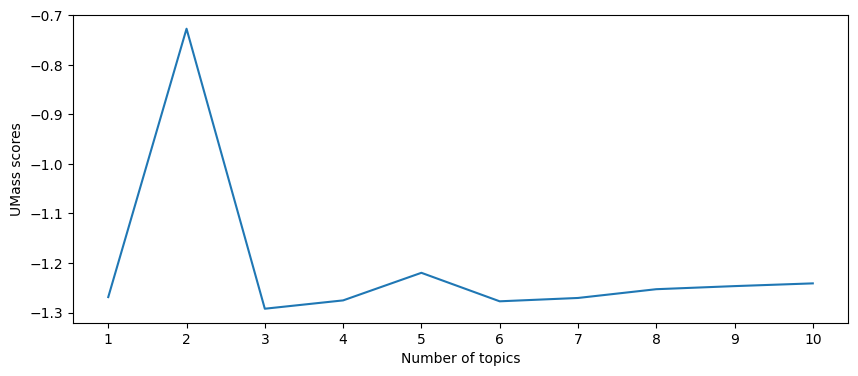

In [ ]:
# A plot is created that depicts the coherence scores.

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(umass_dict.keys(), umass_dict.values())
ax.set_xticks(list(umass_dict.keys()))
ax.set_xlabel('Number of topics')
ax.set_ylabel('UMass scores')

plt.show()

In [ ]:
# This is a manual check of the keys file.

keys_file = '/keys (1).csv'
keys_df = pd.read_csv(keys_file)
keys_df

,Topic,TokenCount,Words
0,0,10761,development technology ict information communi...
1,1,10245,learning student education technology teacher ...
2,2,12807,design community practice hci technology resea...
3,3,13929,country develop study technology adoption ict ...
4,4,19778,ict project development study use information ...
5,5,9868,woman social technology use about how digital ...
6,6,8681,organization information digital ictd how into...
7,7,10540,system health design paper base develop projec...
8,8,10804,datum user use application design tool system ...
9,9,8779,digital use ict study citizen model africa pub...


In [ ]:
# This is a manual check of the doctopics file.

topic = '/doctopics (1).csv'
topic_df = pd.read_csv(topic, names=['EID', 'topic0', 'topic1', 'topic2', 'topic3', 'topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14'])
topic_df

,EID,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14
0,2-s2.0-84949925428,0.035211,0.112676,0.000000,0.091549,0.035211,0.014085,0.000000,0.000000,0.000000,0.042254,0.049296,0.014085,0.007042,0.232394,0.056338
1,2-s2.0-85013252369,0.129870,0.112554,0.004329,0.069264,0.155844,0.047619,0.000000,0.021645,0.017316,0.000000,0.000000,0.000000,0.000000,0.017316,0.000000
2,2-s2.0-0033076177,0.155844,0.077922,0.000000,0.129870,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311688
3,2-s2.0-0036664842,0.148248,0.000000,0.000000,0.269542,0.000000,0.010782,0.010782,0.002695,0.000000,0.048518,0.000000,0.002695,0.067385,0.040431,0.000000
4,2-s2.0-1842787567,0.106796,0.038835,0.009709,0.000000,0.106796,0.135922,0.116505,0.009709,0.000000,0.000000,0.000000,0.067961,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2-s2.0-85133632751,0.025157,0.000000,0.044025,0.000000,0.000000,0.150943,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.194969,0.194969
1696,2-s2.0-85150946507,0.023256,0.029070,0.000000,0.046512,0.069767,0.093023,0.000000,0.000000,0.098837,0.063953,0.000000,0.000000,0.011628,0.087209,0.133721
1697,2-s2.0-85145674576,0.007692,0.000000,0.026923,0.000000,0.142308,0.000000,0.038462,0.000000,0.000000,0.000000,0.003846,0.000000,0.000000,0.307692,0.111538
1698,2-s2.0-85136213839,0.066225,0.000000,0.000000,0.059603,0.000000,0.006623,0.013245,0.006623,0.006623,0.192053,0.000000,0.000000,0.000000,0.000000,0.251656


In [ ]:
df5 = topic_df['dominant_topic'].value_counts()
print(df5)

4     257
14    235
2     144
12    126
8     114
1     101
10    100
5      99
3      95
0      90
13     83
7      83
11     60
9      59
6      54
Name: dominant_topic, dtype: int64


In [ ]:
# This is a manual check where the topic that holds the most weight is defined as the dominant topic.

import numpy as np
topic_df_cp = topic_df.copy()
del topic_df_cp['EID']

topic_df_cp['dominant_topic'] = np.argmax(topic_df_cp.values, axis=1)
topic_df = topic_df.join(topic_df_cp[['dominant_topic']])
topic_df

,EID,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,dominant_topic
0,2-s2.0-84949925428,0.035211,0.112676,0.000000,0.091549,0.035211,0.014085,0.000000,0.000000,0.000000,0.042254,0.049296,0.014085,0.007042,0.232394,0.056338,13
1,2-s2.0-85013252369,0.129870,0.112554,0.004329,0.069264,0.155844,0.047619,0.000000,0.021645,0.017316,0.000000,0.000000,0.000000,0.000000,0.017316,0.000000,4
2,2-s2.0-0033076177,0.155844,0.077922,0.000000,0.129870,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311688,14
3,2-s2.0-0036664842,0.148248,0.000000,0.000000,0.269542,0.000000,0.010782,0.010782,0.002695,0.000000,0.048518,0.000000,0.002695,0.067385,0.040431,0.000000,3
4,2-s2.0-1842787567,0.106796,0.038835,0.009709,0.000000,0.106796,0.135922,0.116505,0.009709,0.000000,0.000000,0.000000,0.067961,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2-s2.0-85133632751,0.025157,0.000000,0.044025,0.000000,0.000000,0.150943,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.194969,0.194969,13
1696,2-s2.0-85150946507,0.023256,0.029070,0.000000,0.046512,0.069767,0.093023,0.000000,0.000000,0.098837,0.063953,0.000000,0.000000,0.011628,0.087209,0.133721,14
1697,2-s2.0-85145674576,0.007692,0.000000,0.026923,0.000000,0.142308,0.000000,0.038462,0.000000,0.000000,0.000000,0.003846,0.000000,0.000000,0.307692,0.111538,13
1698,2-s2.0-85136213839,0.066225,0.000000,0.000000,0.059603,0.000000,0.006623,0.013245,0.006623,0.006623,0.192053,0.000000,0.000000,0.000000,0.000000,0.251656,14


In [ ]:
# This is another manual check involving the dominant topic along with the abstracts.

topic4 = topic_df.loc[topic_df['dominant_topic']==4].sort_values(by='topic4', ascending=False)
topic4_10_abstract = topic4.head(10)
topic4_10_abstract = topic4_10_abstract.merge(data[['EID', 'Abstract']], how='left')
topic4_10_abstract

,EID,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,dominant_topic,Abstract
0,2-s2.0-85097710471,0.031008,0.000000,0.015504,0.007752,0.558140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,One of the significant determinant factors in ...
1,2-s2.0-85127442600,0.000000,0.007463,0.000000,0.000000,0.455224,0.044776,0.000000,0.000000,0.000000,0.067164,0.000000,0.000000,0.000000,0.074627,0.000000,4,"In this study, we examine the empirical relati..."
2,2-s2.0-84924559981,0.043210,0.000000,0.000000,0.000000,0.450617,0.000000,0.049383,0.000000,0.018519,0.000000,0.000000,0.012346,0.000000,0.067901,0.000000,4,Most existing ICT for development (ICT4D) lite...
3,2-s2.0-84978138716,0.013605,0.000000,0.000000,0.000000,0.448980,0.013605,0.000000,0.047619,0.000000,0.061224,0.000000,0.000000,0.000000,0.054422,0.000000,4,Purpose: The purpose of this study is to under...
4,2-s2.0-85089215098,0.008000,0.016000,0.032000,0.000000,0.432000,0.000000,0.000000,0.024000,0.000000,0.000000,0.000000,0.064000,0.000000,0.000000,0.056000,4,Effective stakeholder identification and engag...
5,2-s2.0-85090676407,0.000000,0.000000,0.000000,0.000000,0.414013,0.012739,0.000000,0.057325,0.000000,0.000000,0.006369,0.063694,0.000000,0.000000,0.082803,4,Stakeholder interactions play a vital role in ...
6,2-s2.0-84862674313,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,The panel will capture some of the breadth and...
7,2-s2.0-85018837341,0.000000,0.000000,0.000000,0.000000,0.395973,0.000000,0.026846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.234899,4,Information and communication technologies (IC...
8,2-s2.0-84955266778,0.181818,0.000000,0.030303,0.000000,0.393939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,4,Kleine's choice framework (CF) is a significan...
9,2-s2.0-84878797631,0.014815,0.000000,0.007407,0.037037,0.392593,0.000000,0.000000,0.000000,0.000000,0.051852,0.014815,0.029630,0.051852,0.000000,0.074074,4,The difficulty of sustaining ICT4D projects in...


This analysis suggests that information, communication, and technological development (ICTD) research should prioritize stakeholder involvement. The dominant topic found in this topic modeling analysis was topic 4. Topic 4 is a theme that can be expressed by the following words: ICT, project, study, development, and information. Since this is the dominant topic and the most frequently occurring dominant topic in the data, it is important to understand this topic in terms of the abstracts. The ability to interpret the abstracts in light of the emerging topics is also an indicator that topic modeling was performed sufficiently. The dominant topic in addition to the abstracts emphasize the importance of stakeholder involvement and stakeholders’ interactions for ICTD research and initiatives. Many of the abstracts with this topic discuss stakeholders as having a crucial role in ICTD development. Though researchers should take stakeholders’ participation into consideration for new proposals, researchers should also explore how topics with strong correlations might create new avenues for future research.